# Probability Density Function (PDF)

A Probability Density Function (PDF) is a statistical concept used in probability theory and statistics to describe the likelihood of a continuous random variable falling within a particular range. It provides a way to model the distribution of a continuous random variable and is often associated with probability distributions such as the normal distribution.

## Key Points about PDFs:

1. **Continuous Random Variables:**
   - PDFs are primarily used for continuous random variables (as opposed to discrete random variables, which have Probability Mass Functions, or PMFs).

2. **Function Form:**
   - A PDF is a function that describes the relative likelihood of different outcomes for a continuous random variable.
   - The PDF for a normal distribution with mean ($\mu$) and standard deviation ($\sigma$) is given by:
     $ [ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} ] $

3. **Non-Negative Values:**
   - The values of the PDF are non-negative for all possible values of the random variable.
   - The integral (area under the curve) of the PDF over the entire range of possible values is equal to 1.

4. **Probability Interpretation:**
   - While the PDF itself does not give the probability of a specific outcome (as the probability at a single point is zero for a continuous variable), the probability of the variable falling within a specific interval is given by the integral of the PDF over that interval.

5. **Example:**
   - For example, in the case of a standard normal distribution, the PDF describes the shape of the bell curve and provides information about the likelihood of observing values within different ranges.


Mathematically, the probability that a continuous random variable $(X)$ falls within the interval $(a, b)$ is given by the integral of the Probability Density Function (PDF) ($f(x)$) over that interval:

  $ [ P(a \leq X \leq b) = \int_{a}^{b} f(x) \,dx ] $
  Let's consider a simple example to understand this formula:

  Assume we have a continuous random variable $(X)$ representing the height of people in a population, and $(f(x))$ is the PDF of $(X)$. The interval $((a, b))$ could represent a range of heights, such as from 160 cm to 170 cm.

  - ($a$): The lower limit of the interval, 160 cm in this example.
  - ($b$): The upper limit of the interval, 170 cm in this example.

  The probability $(P(a \leq X \leq b))$ represents the likelihood that a randomly selected person from the population has a height between 160 cm and 170 cm.

  The integral $(\int_{a}^{b} f(x) \,dx)$ calculates the area under the PDF curve within the interval $((a, b))$. In this context, the area under the curve represents the probability of observing a height within the specified range.

  For example, if $(f(x))$ is a bell-shaped curve (like a normal distribution), the integral gives the proportion of the population within the height range $((a, b))$.

  In terms of inequalities:
  - $(x \geq a)$: This condition ensures that $(x)$ is greater than or equal to the lower limit $(a)$.
  - $(x \leq b)$: This condition ensures that $(x)$ is less than or equal to the upper limit $(b)$.

  So, $(P(a \leq X \leq b))$ is the probability that $(X)$ falls within the interval $((a, b))$, and the integral captures the probability by measuring the area under the PDF curve within that interval.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

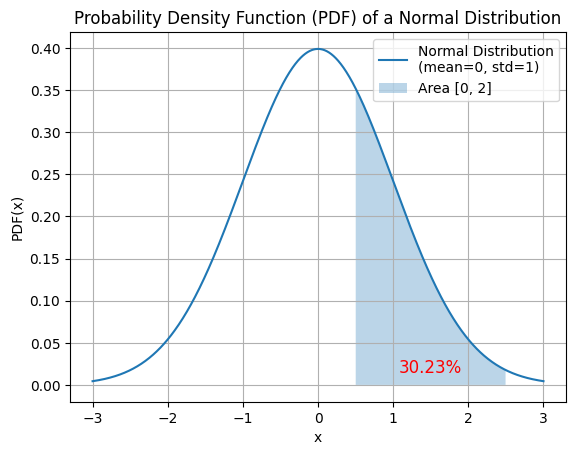

Percentage that X falls within [0, 2]: 30.23%
total area under the PDF curve: 1.0


In [100]:
# Define parameters for the normal distribution
mu = 0    # mean
sigma = 1 # standard deviation

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)

# Calculate the PDF using norm.pdf
pdf_values = norm.pdf(x, mu, sigma)

plt.plot(x, pdf_values, label=f'Normal Distribution\n(mean={mu}, std={sigma})')
plt.title('Probability Density Function (PDF) of a Normal Distribution')
plt.xlabel('x')
plt.ylabel('PDF(x)')

# Shade the area under the curve between 0 and 2
lower_bound = 0.5
upper_bound = 2.5
plt.fill_between(x, pdf_values, where=[(lower_bound <= xi <= upper_bound) for xi in x], alpha=0.3, label='Area [0, 2]')

# Calculate the percentage of getting a value between 0 and 2
percentage = (norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)) * 100

# Label the shaded area with the percentage
plt.text((lower_bound + upper_bound) / 2, 0.02, f'{percentage:.2f}%', ha='center', va='center', color='red', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

print(f'Percentage that X falls within [0, 2]: {percentage:.2f}%')

# Print the total area under the PDF curve (should be close to 1)
area, _ = np.round(quad(lambda x: norm.pdf(x, mu, 1), -np.inf, np.inf))
print(f"total area under the PDF curve: {area}")

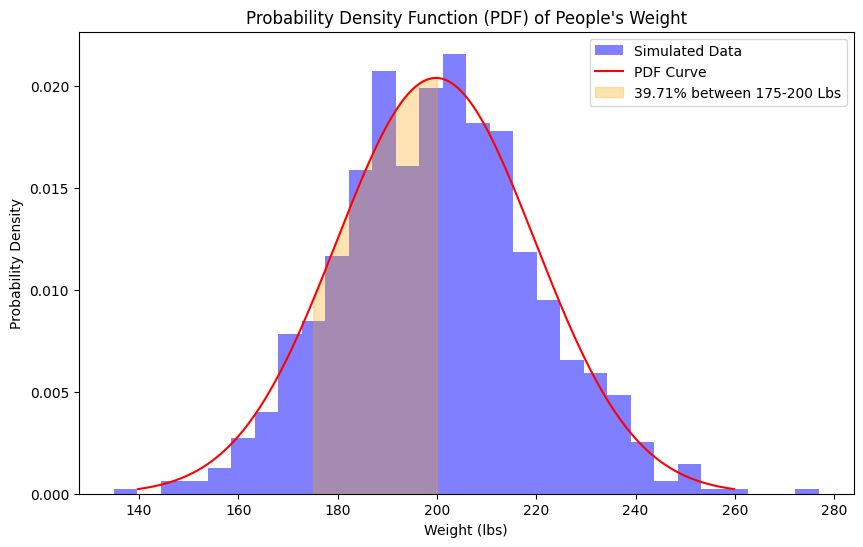

Probability of weighing between 150 lbs and 250 lbs: 39.71%


In [87]:
np.random.seed(42)

usa_men_mean = 199.8  # Mean weight in the USA for men
usa_men_std  = 20     # Standard deviation

sample = np.random.normal(loc=usa_men_mean, scale=usa_men_std, size=1000)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

x_values = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)

lower_bound = 175 # lbs
upper_bound = 200 # lbs
pdf_values  = norm.pdf(x_values, sample_mean, sample_std)
p_175_200   = norm.cdf(upper_bound, sample_mean, sample_std) - norm.cdf(lower_bound, sample_mean, sample_std)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.5, color='blue', label='Simulated Data')
plt.title('Probability Density Function (PDF) of People\'s Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Probability Density')

plt.plot(x, pdf_values, 'r-', label='PDF Curve')

# Highlight the range of interest (between 150 lbs and 250 lbs)
plt.fill_between(x, pdf_values, where=((x >= 175) & (x <= 200)), color='orange', alpha=0.3, label=f"{p_175_200:.2%} between 175-200 Lbs")

plt.legend()
plt.show()

print(f"Probability of weighing between 150 lbs and 250 lbs: {p_175_200:.2%}")

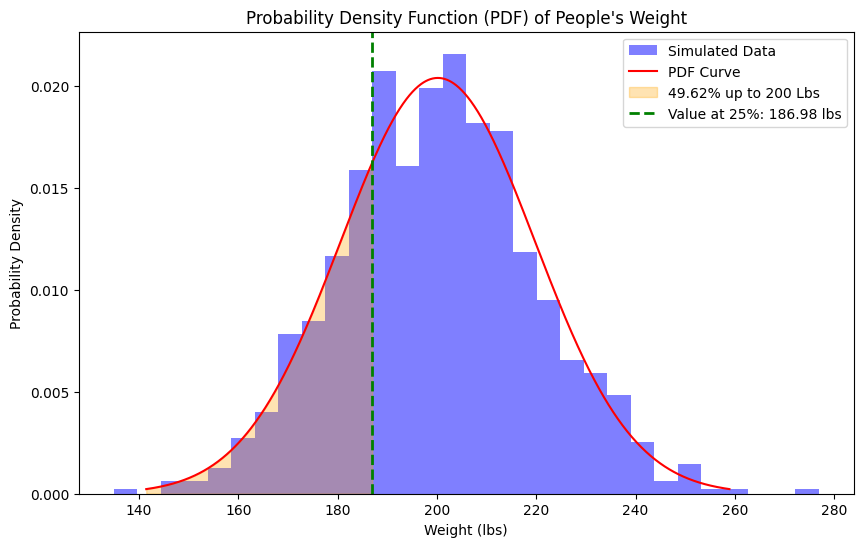

Weight range corresponding to a cumulative probability of 25%: Up to 186.98 lbs


In [88]:
np.random.seed(42)

usa_men_mean = 199.8  # Mean weight in the USA for men
usa_men_std  = 20     # Standard deviation

sample = np.random.normal(loc=usa_men_mean, scale=usa_men_std, size=1000)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

x_values = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)

# Calculate the PDF values
pdf_values  = norm.pdf(x_values, sample_mean, sample_std)

# Calculate the cumulative probability up to 200 lbs
cumulative_prob_up_to_200 = norm.cdf(200, sample_mean, sample_std)

# Find the value corresponding to the cumulative probability of 25%
corresponding_prob = 0.25
inverse_value = norm.ppf(corresponding_prob, sample_mean, sample_std)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.5, color='blue', label='Simulated Data')
plt.title('Probability Density Function (PDF) of People\'s Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Probability Density')

plt.plot(x_values, pdf_values, 'r-', label='PDF Curve')

# Highlight the range of interest (up to 200 lbs)
plt.fill_between(x_values, pdf_values, where=(x_values <= inverse_value), color='orange', alpha=0.3, label=f"{cumulative_prob_up_to_200:.2%} up to 200 Lbs")

# Add a vertical line at the inverse value
plt.axvline(inverse_value, color='green', linestyle='dashed', linewidth=2, label=f'Value at {corresponding_prob:.0%}: {inverse_value:.2f} lbs')

plt.legend()
plt.show()

print(f"Weight range corresponding to a cumulative probability of {corresponding_prob:.0%}: Up to {inverse_value:.2f} lbs")
